IRIS Flower Classification 

In [63]:
import pandas as pd # for dataset cleaning
import numpy as np # for calculation
import seaborn as sns # for data visualisation 
import matplotlib.pyplot as plt # for plot the data
from sklearn.datasets import load_iris # dataset 
from sklearn.model_selection import train_test_split # split data for train and test
from sklearn.preprocessing import StandardScaler # used to imporve model performance 
from sklearn.linear_model import LogisticRegression # model 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # matrix , accuracy , report 

In [64]:
iris = load_iris() # dataset assigned to the variable iris
# print(iris)
# print(type(iris))
# print(iris.feature_names)
# print(iris.target_names)
# print(iris.data)
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0:'setosa ', 1 : 'versicolor', 2 : 'virginica'})

# print(iris.target_names)
df.head()
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [65]:
df.shape # 150 rows and 5 columns where 4 features and one lable 

(150, 5)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Pairplot Explain relation between 3 species where setosa is different and dont have same features  with other 2 but veriscolor and virginica both have overlap features 

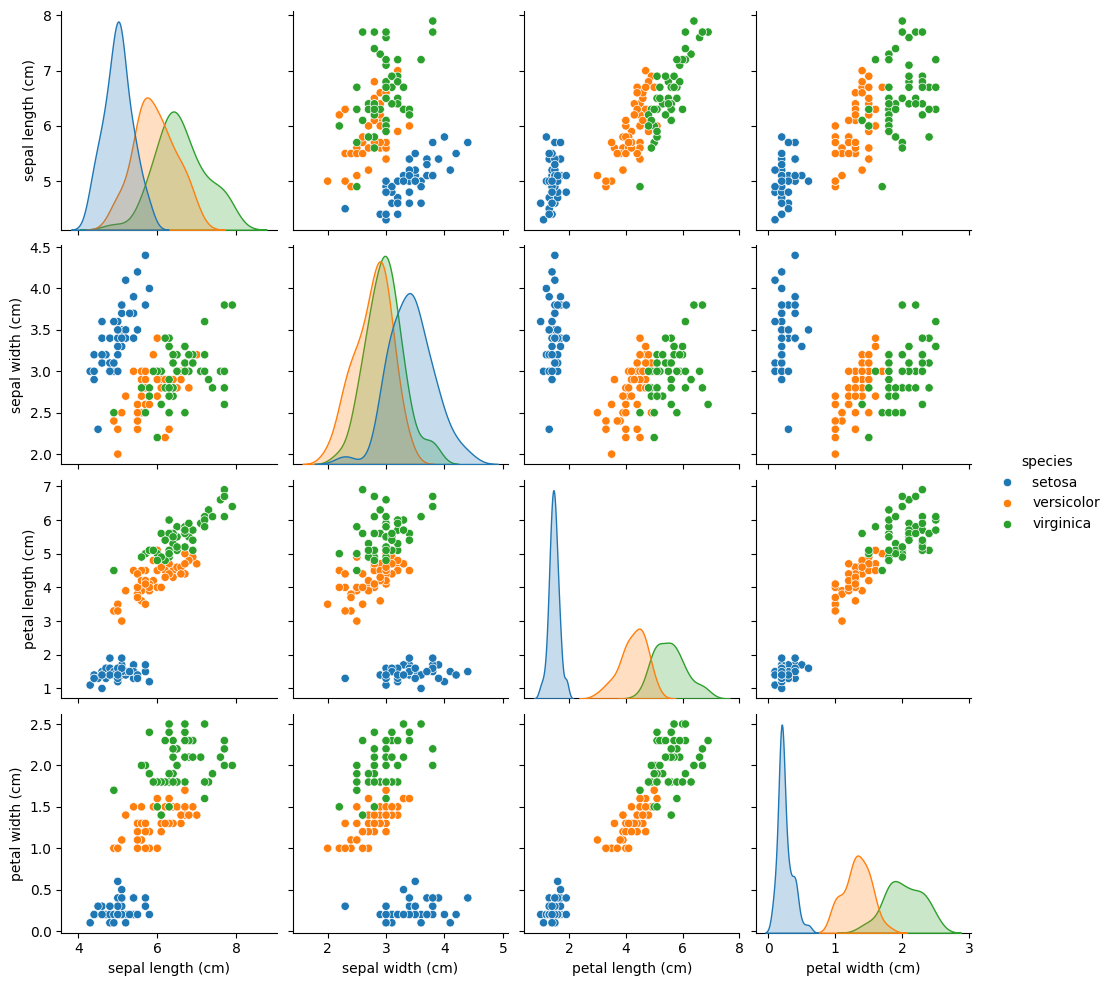

In [67]:
sns.pairplot(df , hue='species')

In [68]:
df['species'] = df['species'].str.strip()

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df['species'])

# Features
X = df.drop('species', axis=1)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 

In [69]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

Output : 

In [70]:
sample = np.array([[6.7,3.0,5.2,2.3]])
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)
print("prediction : " ,le.inverse_transform(prediction)[0])

prediction :  virginica


C:\Users\sushm\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
